In [1]:
import os
import numpy as np
import tensorflow as tf
import DeformableConvLayerTF as DCL
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

/home/jlk/anaconda3/envs/jlk_mammo_retina/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/jlk/anaconda3/envs/jlk_mammo_retina/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/jlk/anaconda3/envs/jlk_mammo_retina/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/jlk/anaconda3/envs/

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('./mnist/data', one_hot = True)

W0903 09:23:28.681446 139908645107520 deprecation.py:323] From <ipython-input-2-ad63f48a193f>:2: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0903 09:23:28.681884 139908645107520 deprecation.py:323] From /home/jlk/anaconda3/envs/jlk_mammo_retina/lib/python3.6/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0903 09:23:28.682256 139908645107520 deprecation.py:323] From /home/jlk/anaconda3/envs/jlk_mammo_retina/lib/python3.6/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:262: extract_images (from tensorflow.contrib.learn.python.learn.datasets.mnist) is d

Extracting ./mnist/data/train-images-idx3-ubyte.gz
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz


In [3]:
batch_size = 100
lr = 1e-3
epochs = 15
total_batch = int(mnist.train.num_examples / batch_size)
input_images = tf.placeholder(tf.float32, [None, 28, 28, 1])
y = tf.placeholder(tf.float32, [None, 10])

In [4]:
dcl = DCL.deformable_conv(input_images,
                         name = '1',
                         batch_size = batch_size,
                         filters = 32,
                         kernel_size = 3)
x = tf.nn.relu(dcl)
x = tf.layers.max_pooling2d(x,
                           pool_size = (2,2),
                           strides = (2,2))

x = tf.layers.conv2d(x,
                    filters = 64,
                    kernel_size = (3, 3),
                    strides = (1,1),
                    padding = 'same')
x = tf.nn.relu(x)
x = tf.layers.max_pooling2d(x,
                           pool_size = (2,2),
                           strides = (2,2))

x = tf.layers.flatten(x)
x = tf.layers.dense(x, 256, activation = tf.nn.relu)
logits = tf.layers.dense(x, 10, activation = None)
outputs = tf.nn.sigmoid(logits)

W0903 09:23:28.943233 139908645107520 deprecation.py:506] From /home/jlk/Desktop/JLK/DCN_MNIST/DeformableConvLayerTF.py:16: calling extract_image_patches (from tensorflow.python.ops.array_ops) with ksizes is deprecated and will be removed in a future version.
Instructions for updating:
ksizes is deprecated, use sizes instead
W0903 09:23:28.947493 139908645107520 deprecation.py:323] From /home/jlk/Desktop/JLK/DCN_MNIST/DeformableConvLayerTF.py:30: conv2d (from tensorflow.python.layers.convolutional) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.keras.layers.Conv2D` instead.
W0903 09:23:29.136550 139908645107520 deprecation.py:323] From /home/jlk/Desktop/JLK/DCN_MNIST/DeformableConvLayerTF.py:65: to_float (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.cast` instead.
W0903 09:23:29.157801 139908645107520 deprecation.py:323] From <ipython-input-4-26af73a63550>:9: max

In [5]:
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = logits, labels = y))
optimizer = tf.train.AdamOptimizer(learning_rate = lr).minimize(loss)

W0903 09:23:29.621017 139908645107520 deprecation.py:323] From /home/jlk/anaconda3/envs/jlk_mammo_retina/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [6]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [7]:
for epoch in range(epochs):
    total_cost = 0
    for i in range(total_batch):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        batch_x = batch_x.reshape(-1, 28, 28, 1)
        _, lossVal = sess.run([optimizer, loss], feed_dict = {input_images : batch_x, y : batch_y})
        total_cost += lossVal
    print('\nEpoch:', '%04d' % (epoch + 1),
          'Avg. cost =', '{:.4f}'.format(total_cost / total_batch))   


Epoch: 0001 Avg. cost = 0.2474

Epoch: 0002 Avg. cost = 0.0728

Epoch: 0003 Avg. cost = 0.0521

Epoch: 0004 Avg. cost = 0.0390

Epoch: 0005 Avg. cost = 0.0307

Epoch: 0006 Avg. cost = 0.0242

Epoch: 0007 Avg. cost = 0.0204

Epoch: 0008 Avg. cost = 0.0158

Epoch: 0009 Avg. cost = 0.0131

Epoch: 0010 Avg. cost = 0.0130

Epoch: 0011 Avg. cost = 0.0115

Epoch: 0012 Avg. cost = 0.0087

Epoch: 0013 Avg. cost = 0.0073

Epoch: 0014 Avg. cost = 0.0065

Epoch: 0015 Avg. cost = 0.0083


In [8]:
test_batch = int(mnist.test.num_examples / batch_size)
PREDS, LABELS = [], []
for i in range(test_batch):
    test_x, test_y = mnist.test.next_batch(batch_size)
    test_x = test_x.reshape(-1, 28, 28, 1)
    pred = sess.run(outputs, feed_dict = {input_images : test_x})

    PREDS.append(pred)
    LABELS.append(test_y)
PREDS = np.reshape(PREDS, (-1,10))
LABELS = np.reshape(LABELS, (-1,10))
is_correct = np.equal(np.argmax(PREDS, axis = 1), np.argmax(LABELS, axis = 1))
acc = np.mean(is_correct.astype(np.float32))
print('정확도 : {:.4f}' .format(acc))

정확도 : 0.9851


In [11]:
test_x.shape


(100, 28, 28, 1)

W0903 09:35:29.300931 139908645107520 image.py:700] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0903 09:35:29.316373 139908645107520 image.py:700] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0903 09:35:29.330421 139908645107520 image.py:700] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0903 09:35:29.345139 139908645107520 image.py:700] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


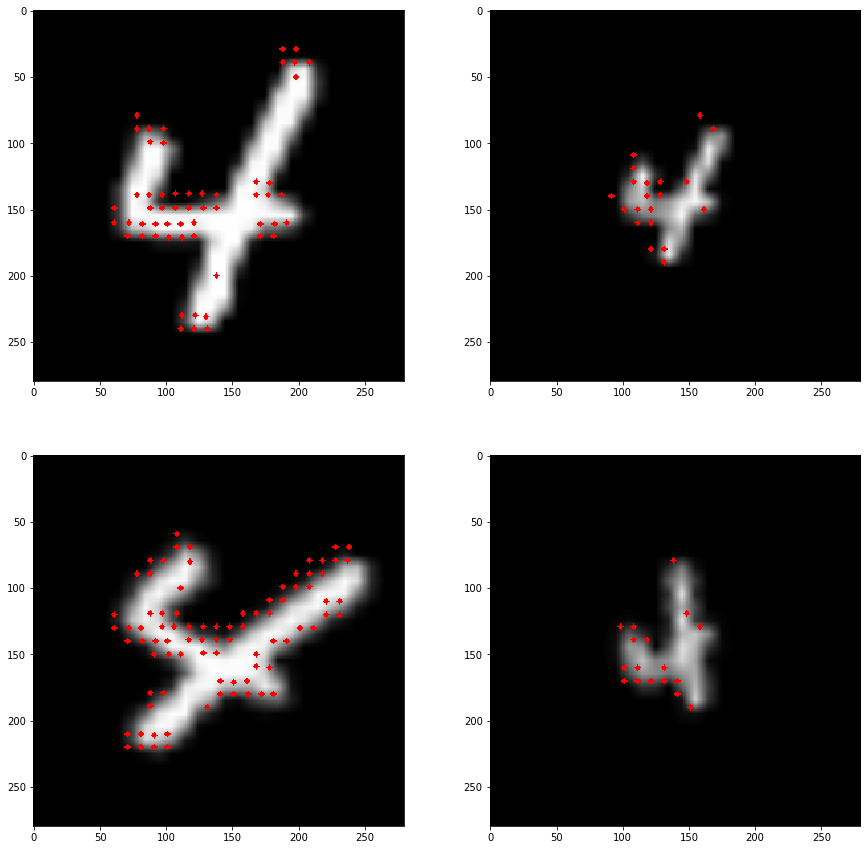

In [15]:
import matplotlib.pyplot as plt
import cv2
cut = 1
idx = 10
test_image1 = test_x[idx][..., 0]

test_image2 = cv2.resize(test_image1, (14,14))
test_image2 = cv2.copyMakeBorder(test_image2, 7, 7, 7, 7, cv2.BORDER_CONSTANT, value = (0, 0, 0))

M1 = cv2.getRotationMatrix2D((14,14,), -30, 1)
test_image3 = cv2.warpAffine(test_image1, M1, (28,28))

M2 = cv2.getRotationMatrix2D((14,14,), 30, 1)
test_image4 = cv2.warpAffine(test_image2, M2, (28,28))

test_images = np.array([test_image1, test_image2, test_image3, test_image4])[:,:,:,np.newaxis]

graph = tf.get_default_graph()
offset_op = graph.get_tensor_by_name('offset_1/BiasAdd:0')

offsets = sess.run(offset_op, feed_dict = {input_images : test_images})

plt.figure(1, figsize = (15, 15))
for idx, (test_image, offset) in enumerate(zip(test_images, offsets)):
    offset_x = offset[..., 0] * 10
    offset_y = offset[..., 1] * 10
    test_image = cv2.resize(test_image, (280, 280))
    test_image = cv2.merge((test_image, test_image, test_image))
    
    for i in range(28):
        for j in range(28):
            x_coordi = offset_x[j, i]
            y_coordi = offset_y[j, i]
            xx = int(x_coordi + i * 10)
            yy = int(y_coordi + j * 10)
            
            if abs(x_coordi) >= cut or abs(y_coordi) >= cut:
                test_image = cv2.circle(test_image, (xx, yy), 2, (255, 0, 0), -1)
    plt.subplot(2,2, idx + 1)
    plt.imshow(test_image)
plt.show()     